<a href="https://colab.research.google.com/github/JJay1010/sw-team_project/blob/main/%EA%B0%95%EC%9D%80%EC%A3%BC/230206_commit_efficientNetB0_224_Ab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다시 시도해봐야함, epoch을 충분히 돌지 않고 중단시켰음

In [ ]:
! pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=8f87e39be17e94954572e70ce738e696d7de9df27159fef20587c7059cab049b
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import numpy as np

x_data = np.load('/content/drive/MyDrive/team_project/adbominal_data/data_224/Ab02_x_data.npy')
y_data = np.load('/content/drive/MyDrive/team_project/adbominal_data/data_224/Ab02_y_data.npy')

In [ ]:
x_data.shape

(9436, 224, 224, 3)

In [ ]:
y_data.shape

(9436,)

In [ ]:
from tensorflow.keras import applications
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
def efficientNet_all_frz_model():
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights = 'imagenet')
  base_model.trainable = False
  flat_layer = layers.GlobalAveragePooling2D()(base_model.output)
  output = layers.Dense(1, activation = 'sigmoid')(flat_layer)
  model = tf.keras.models.Model(base_model.input, output)
  return model


In [ ]:
model = efficientNet_all_frz_model()

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
# Compile the model using an optimizer, a loss function, and evaluation metrics

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Split your data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)


In [ ]:
# Create a tf.data.Dataset for your training data

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(x_train)).batch(32)


In [ ]:
# initialize wandb
import wandb

wandb.init(project='dog-Ab02-efficientNet-224')


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jjay1010. Use `wandb login --relogin` to force relogin


In [ ]:
# Train the model using fit and the training Dataset:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

history = model.fit(train_dataset.repeat(), epochs=30, steps_per_epoch=len(x_train)//32, callbacks=[
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")
                    ])

Epoch 1/30
235/235 [==============================] - ETA: 0s - loss: 0.0964 - accuracy: 0.9827

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 57s 190ms/step - loss: 0.0964 - accuracy: 0.9827
Epoch 2/30
235/235 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9834

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 190ms/step - loss: 0.0776 - accuracy: 0.9834
Epoch 3/30
235/235 [==============================] - ETA: 0s - loss: 0.0768 - accuracy: 0.9826

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 191ms/step - loss: 0.0768 - accuracy: 0.9826
Epoch 4/30
235/235 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9834

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 44s 190ms/step - loss: 0.0688 - accuracy: 0.9834
Epoch 5/30
235/235 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9827

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 191ms/step - loss: 0.0704 - accuracy: 0.9827
Epoch 6/30
235/235 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9834

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 52s 220ms/step - loss: 0.0661 - accuracy: 0.9834
Epoch 7/30
235/235 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9836

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 44s 190ms/step - loss: 0.0652 - accuracy: 0.9836
Epoch 8/30
235/235 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9830

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 193ms/step - loss: 0.0657 - accuracy: 0.9830
Epoch 9/30
235/235 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9844

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 192ms/step - loss: 0.0604 - accuracy: 0.9844
Epoch 10/30
235/235 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9838

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 193ms/step - loss: 0.0623 - accuracy: 0.9838
Epoch 11/30
235/235 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9832

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 190ms/step - loss: 0.0634 - accuracy: 0.9832
Epoch 12/30
235/235 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.9847

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 191ms/step - loss: 0.0596 - accuracy: 0.9847
Epoch 13/30
235/235 [==============================] - ETA: 0s - loss: 0.0558 - accuracy: 0.9852

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 46s 196ms/step - loss: 0.0558 - accuracy: 0.9852
Epoch 14/30
235/235 [==============================] - ETA: 0s - loss: 0.0598 - accuracy: 0.9842

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 192ms/step - loss: 0.0598 - accuracy: 0.9842
Epoch 15/30
235/235 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9840

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 45s 192ms/step - loss: 0.0567 - accuracy: 0.9840
Epoch 16/30
235/235 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9848

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
wandb.log({'Test Loss': test_loss, 'Test Accuracy': test_acc})


30/30 [==============================] - 4s 75ms/step - loss: 0.0526 - accuracy: 0.9883


In [ ]:
wandb.finish()

Test Accuracy,▁
Test Loss,▁
batch/accuracy,▆▆▆▆▆▁▆▆▆▆▅▆▆▆▆▅▆▆▆▆▇▆▃▅▆▆▆█▆▆▇▆▅▆▆▆▆▇▆▆
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,▇▅▄▃▃█▃▃▂▂▄▃▃▃▂▄▃▂▂▂▂▂▂▃▂▂▂▁▂▂▂▂▃▂▂▂▂▂▂▂
epoch/accuracy,▁▃▁▃▁▃▄▂▆▄▃▇█▅▅▇
epoch/epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▅▃▄▃▃▃▂▂▂▂▁▂▁▁
Test Accuracy,0.98835


In [ ]:
model.save('/content/drive/MyDrive/team_project/adbominal_model/efficientNet_Ab02_224_32_0_001_all_frz.h5')

30/30 [==============================] - 2s 58ms/step


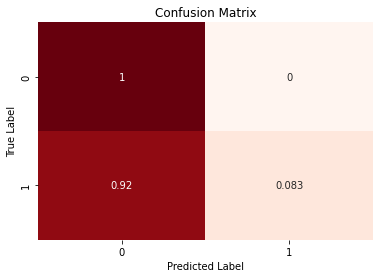

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the validation data
y_pred = model.predict(x_val)

y_pred_discrete = np.round(y_pred)

# Normalize the confusion matrix to get the ratios
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix using Seaborn
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_2nd = tf.keras.models.load_model('/content/drive/MyDrive/team_project/adbominal_model/efficientNet_Ab02_224_32_0_001_all_frz.h5')

In [ ]:
model_2nd.trainable = True
model_2nd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
len(model_2nd.layers)

240

In [ ]:
for layer in model_2nd.layers[:120]:
  layer.trainable = False

In [ ]:
model_2nd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
model = model_2nd

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# initialize wandb
import wandb

wandb.init(project='dog-Ab01-efficientNet-224')

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jjay1010. Use `wandb login --relogin` to force relogin


In [ ]:
# Train the model using fit and the training Dataset:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

history = model.fit(train_dataset.repeat(), epochs=30, steps_per_epoch=len(x_train)//32, callbacks=[
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")
                    ])

Epoch 1/30
235/235 [==============================] - ETA: 0s - loss: 0.0865 - accuracy: 0.9799

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 70s 226ms/step - loss: 0.0865 - accuracy: 0.9799
Epoch 2/30
235/235 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9852

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 54s 228ms/step - loss: 0.0536 - accuracy: 0.9852
Epoch 3/30
235/235 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9832

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 224ms/step - loss: 0.0491 - accuracy: 0.9832
Epoch 4/30
235/235 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9883

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 224ms/step - loss: 0.0349 - accuracy: 0.9883
Epoch 5/30
235/235 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9904

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 226ms/step - loss: 0.0251 - accuracy: 0.9904
Epoch 6/30
235/235 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9922

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 227ms/step - loss: 0.0197 - accuracy: 0.9922
Epoch 7/30
235/235 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9927

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 54s 228ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 8/30
235/235 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9937

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 54s 229ms/step - loss: 0.0172 - accuracy: 0.9937
Epoch 9/30
235/235 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9957

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 227ms/step - loss: 0.0107 - accuracy: 0.9957
Epoch 10/30
235/235 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9955

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 54s 230ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 11/30
235/235 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9968

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 52s 223ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 12/30
235/235 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9961

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 225ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 13/30
235/235 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9969

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 225ms/step - loss: 0.0077 - accuracy: 0.9969
Epoch 14/30
235/235 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9959

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 227ms/step - loss: 0.0095 - accuracy: 0.9959
Epoch 15/30
235/235 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9965

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 226ms/step - loss: 0.0096 - accuracy: 0.9965
Epoch 16/30
235/235 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9968

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 52s 223ms/step - loss: 0.0086 - accuracy: 0.9968
Epoch 17/30
235/235 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9964

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 226ms/step - loss: 0.0126 - accuracy: 0.9964
Epoch 18/30
235/235 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9969

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 52s 223ms/step - loss: 0.0074 - accuracy: 0.9969
Epoch 19/30
235/235 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9976

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 227ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 20/30
235/235 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9969

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 225ms/step - loss: 0.0072 - accuracy: 0.9969
Epoch 21/30
235/235 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9975

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 224ms/step - loss: 0.0070 - accuracy: 0.9975
Epoch 22/30
235/235 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9953

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 54s 228ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 23/30
235/235 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9984

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 226ms/step - loss: 0.0039 - accuracy: 0.9984
Epoch 24/30
235/235 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9967

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 225ms/step - loss: 0.0084 - accuracy: 0.9967
Epoch 25/30
235/235 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9983

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 225ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 26/30
235/235 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9967

wandb: Adding directory to artifact (./models)... Done. 0.1s


235/235 [==============================] - 53s 224ms/step - loss: 0.0059 - accuracy: 0.9967
Epoch 27/30
235/235 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9979

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 54s 229ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 28/30
235/235 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9964

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 224ms/step - loss: 0.0098 - accuracy: 0.9964
Epoch 29/30
235/235 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9952

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 225ms/step - loss: 0.0120 - accuracy: 0.9952
Epoch 30/30
235/235 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9976

wandb: Adding directory to artifact (./models)... Done. 0.2s


235/235 [==============================] - 53s 226ms/step - loss: 0.0043 - accuracy: 0.9976


In [ ]:
# Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
wandb.log({'Test Loss': test_loss, 'Test Accuracy': test_acc})


30/30 [==============================] - 4s 74ms/step - loss: 0.0684 - accuracy: 0.9936


In [ ]:
wandb.finish()

Test Accuracy,▁
Test Loss,▁
batch/accuracy,▃▁▅▆▂▅▆▆▆▇▇▇▇▇▇▇█▇▇▇▇▇███▅▇████▇██▇██▇▇█
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,▆█▃▃▃▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▂▁
epoch/accuracy,▁▃▂▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇█▇█▇█▇█▇█▇▇█
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▅▄▃▂▃▂▂▂▂▂▁▁▁▁▂▁▁▁▁▂▁▁▁▁▁▂▂▁
Test Accuracy,0.99364


In [ ]:
model.save('/content/drive/MyDrive/team_project/adbominal_model/efficientNet_Ab01_224_128_0_001_half_frz.h5')

30/30 [==============================] - 2s 57ms/step


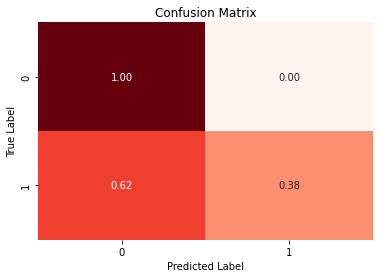

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the validation data
y_pred = model.predict(x_val)

y_pred_discrete = np.round(y_pred)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_val, y_pred_discrete)

# Normalize the confusion matrix to get the ratios
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix using Seaborn
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
np.unique(y_data,return_counts = True)

(array([0, 1], dtype=int32), array([9284,  152]))